## Basit Doğrusal Regresyon Modeli Uygulaması

Advertising veri setini kullanarak tv, radyo ve gazete reklamları ile bu reklamların satışa olan etkilerini inceleyeceğiz.  
Model kurarak bağımlı ve bağımsız değişkenlerimizin etkilerine birlikte bakacağız.

Bağımlı değişkenimiz 'sales'  
Bağımsız değişkenlerimiz ise 'tv, radyo ve gazete' değişkenleridir.  

Basit Doğrusal Regresyon Modeli, bir bağımlı ve bir bağımsız değişkenden oluşmaktadır.  
Bu örnekte bağımsız değişken olarak TV tercih edilmiştir.


In [1]:
# veri seti download 
# http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

import pandas as pd
df = pd.read_csv("C:/Users/onurc/Desktop/Python/00_dataSource/Advertising.csv")
df = df.iloc[:, 1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
# veri setini inceleyelim

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


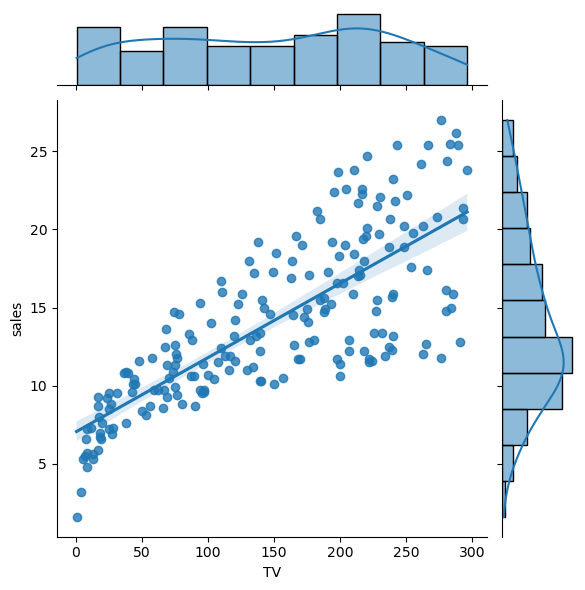

In [3]:
# TV ve Sales değişkenlerinin birlikte incelenmesi

# joinplot iki degisken arasındaki ilişkinin hem dağılımını hem de korelasyonunu göstermek için kullanılan bir grafiktir

import seaborn as sns
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");


# X = bagımsız degisken
# Y = bagımlı degisken
# kind = grafik türü 


# İlişkilerin gösterimine baktığımızda
# TV reklam harcamaları arttıkça sales değişkeninin de arttığı görülüyor.


# Model Kurma 

In [4]:
# Doğrusal Regresyon Modeli (linearRegression) için Gerekli Import Işlemi

from sklearn.linear_model import LinearRegression

In [5]:
x = df[["TV"]]  # bagımsız degisken ataması
y = df[["sales"]] # bagımlı degisken ataması

reg = LinearRegression() 


In [6]:
# Model Kurma (Fit etme) İşlemi

model = reg.fit(x, y)

In [7]:
# Model içerisinden sabit değerimizi (b0) ve katsayımızı (b1) ayıklıyoruz

dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n

In [8]:
# Sabit değerimiz (b0)

model.intercept_

array([7.03259355])

In [9]:
# Katsayımız (b1)

model.coef_

array([[0.04753664]])

In [10]:
# Modelin R-Kare (R²) Alma İşlemi
# Model kurarken baktığımız R-Kare (R²), bağımlı değişkenin model tarafından açıklanan varyans oranını ifade eden bir istatistiktir

model.score(x, y)

# Burada ifade edilen 0.61
# "Satışlardaki değişikliğin yaklaşık %60'ı bağımsız değişkenlerce açıklanabilmektedir" anlamına geliyor

0.611875050850071

# Model Tahmin

Model tahmin, eldeki verilerden öğrenilmiş bir model (kurulan modelin) kullanarak bilinmeyen veya gelecekteki durumlar hakkında kestirim yapma işlemidir.  
Bu süreç, geçmiş verilere dayanarak modelin gelecekteki olayları, değerleri veya davranışları tahmin etmesini sağlar.  


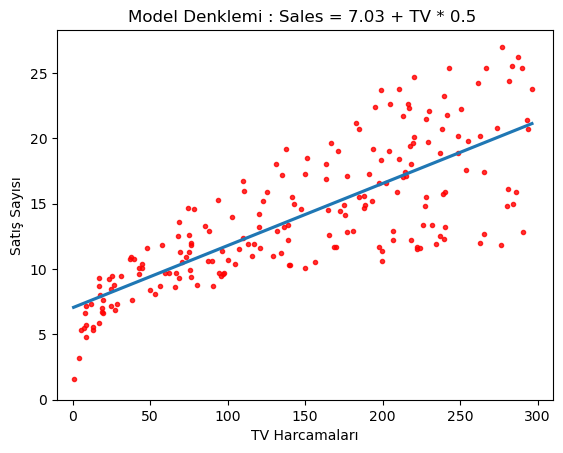

In [11]:
# Kurulan Modelin Geometrik Gösterimi

import seaborn as sns
import matplotlib.pyplot as plt  

# regresyonPlot, dogrusal ilişkiyi gösterir ve bununla birlikte regresyon çizgisi ile tahmin değerlerini getirir
# ci = guven aralıgını kapatır, sadece regresyon çizgisini getirir
# scatter_kws = noktaların stili içindir 
# set_title ve set_xlabel isimlendirme içindir
# ylim ve xlim ise grafikteki noktaların aralıkları içindir

g = sns.regplot(x=df["TV"], y=df["sales"], ci=None, scatter_kws={'color': 'r', 's':9}) 
g.set_title("Model Denklemi : Sales = 7.03 + TV * 0.5 ")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

Oluşturulan tahmin modeli sayesinde, bağımlı ve bağımsız değişkenlerinin birbirlerine etkilerini tahmini olarak görebileceğiz.  
Örn. Ne kadar TV Harcaması gerçekleştirirsek, ne kadar satışımız artar?  
Bahsedilen sonuca aşağıdaki basit regresyon modeli ile ulaşacağız.  

7.03 = B0 = Bulunan Sabit Değer  
0.05 = B1 = Bulunan Katsayı Değişkeni  

Sales = 7.03 + 0.05 * TV

In [12]:
# Örn. 165 birimlik harcama ile 15 birimlik satış artışı
7.03 + 0.05 * 165

#predict, tahmin fonksiyonu

model.predict([[165]])

c:\Users\onurc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [13]:
# 5, 15 ve 30 değerleri ile gerçekleştirilen tahminler

yeni_deger = [[5], [15], [30]]
model.predict(yeni_deger)

c:\Users\onurc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.74564316],
       [8.45869276]])

# Artıklar ve Makine Öğrenmesindeki Önemi

Artıklar : Gerçek Değer ve Tahmin Edilen Değer arasındaki farktan oluşan değerlerdir.  
Model Optimizasyonu için artıkların azaltılması gerekmektedir.

Regresyon Problemleri İçin >  
MSE : Hata Kareler Ortalaması    
RMSE : Hata Kareler Ortalaması Karekökü  
  
Sınıflandırma Problemleri İçin >  
Doğru Sınıflandırma Oranı 

In [14]:
# Gerçek Değerler

y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [15]:
# Tahmin Edilen Değerler

model.predict(x)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [16]:
gercek_deger = pd.DataFrame(y[0:10])

tahmin_deger = pd.DataFrame(model.predict(x)[0:10])

hatalar = pd.concat([gercek_deger, tahmin_deger], axis = 1)

hatalar.columns = (["gercek_deger", "tahmin_deger"])

hatalar



,gercek_deger,tahmin_deger
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [17]:
hatalar["hata"] = hatalar["gercek_deger"] - hatalar["tahmin_deger"]
hatalar

,gercek_deger,tahmin_deger,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [18]:
hatalar["hata_kareler"] = hatalar["hata"]**2
hatalar

,gercek_deger,tahmin_deger,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [19]:
# Hata Kareler Ortalaması

import numpy as np

np.mean(hatalar["hata_kareler"])

9.290350329638105